In [11]:
import netCDF4
import numpy as np
from osgeo import gdal,osr,ogr
import matplotlib.pyplot as plt

In [12]:
# function to create the mask of your shapefile
# function to create the mask of your shapefile
def makeMask(lon,lat,res):
    source_ds = ogr.Open(shapefile)
    source_layer = source_ds.GetLayer()
 
    # Create high res raster in memory
    mem_ds = gdal.GetDriverByName('MEM').Create('', lon.size, lat.size, gdal.GDT_Byte)
    mem_ds.SetGeoTransform((lon.min(), res, 0, lat.max(), 0, -res))
    band = mem_ds.GetRasterBand(1)
 
    # Rasterize shapefile to grid
    gdal.RasterizeLayer(mem_ds, [1], source_layer, burn_values=[1])
 
    # Get rasterized shapefile as numpy array
    array = band.ReadAsArray()
 
    # Flush memory file
    mem_ds = None
    band = None
    return array

In [13]:
# set the data directories
datadir = "/mnt/e/wrf_tibet/test/tibet/"
shapefile = "/mnt/e/wrf_tibet/test/tibet/VNM_adm0.shp"
infile = "ds_tmys_mmsVN_1976-2005_pr_historical_GFDL-ESM2M.nc"
ncs = datadir + infile
 
# read the netcdf data file
nc = netCDF4.Dataset(ncs,'r')
 
# get the precipitation
pr = nc.variables['pr'][:]

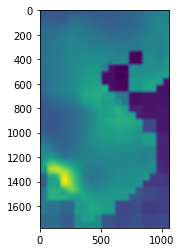

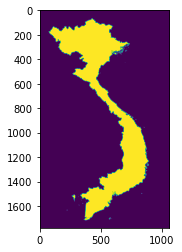

In [14]:

# show the precipitation
plt.imshow(pr)
plt.show()
# get the longitude information
lons = nc.variables['lon'][:]
# get the latitude information
lats = nc.variables['lat'][:]
# calculate the cellsize
cellsize = lons[:][1] - lons[:][0]
 
# create the mask
mask = makeMask(lons,lats,cellsize)
 
# show the mask
plt.imshow(mask)
plt.show()
 


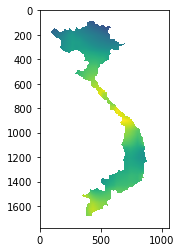

In [15]:
# mask the precipitation data
precip = np.ma.masked_where(mask==0,pr)
 
plt.imshow(precip)
plt.show()
 
# print some stats
#print np.min(precip), np.mean(precip), np.max(precip)